In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

C:\Users\Asus\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
con = sqlite3.connect('final.sqlite') 
final = pd.read_sql_query(""" SELECT * FROM Reviews limit 100000 """, con) 
final['label'] = np.where(final['Score']=='positive', 1, 0)

In [3]:
# splitting into train & test data
X_train_f, X_test_f, Y_train, Y_test = train_test_split(final['CleanedText'], final['label'], train_size= 0.8)

# Bag of Words

In [4]:
#converting text to BOWs
count_vect = CountVectorizer(ngram_range=(1,2), min_df = 0.01) # ignoring words that appears less than 1%
X_train_bow = count_vect.fit_transform(X_train_f.values)
X_test_bow = count_vect.transform(X_test_f)
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler(with_mean=False).fit_transform(X_train_bow)
X_test = StandardScaler(with_mean=False).fit_transform(X_test_bow)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Applying Decision Trees

## [5.1] Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [5]:
# splitting train data into training_new & validation data
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, train_size= 0.8)

In [6]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 5
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 5, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [7]:
auc_score_val

[0.588077639201924,
 0.7263347402405456,
 0.7749903817356412,
 0.751104084973755,
 0.7609683179196476,
 0.7629602988911204,
 0.7629264491379487]

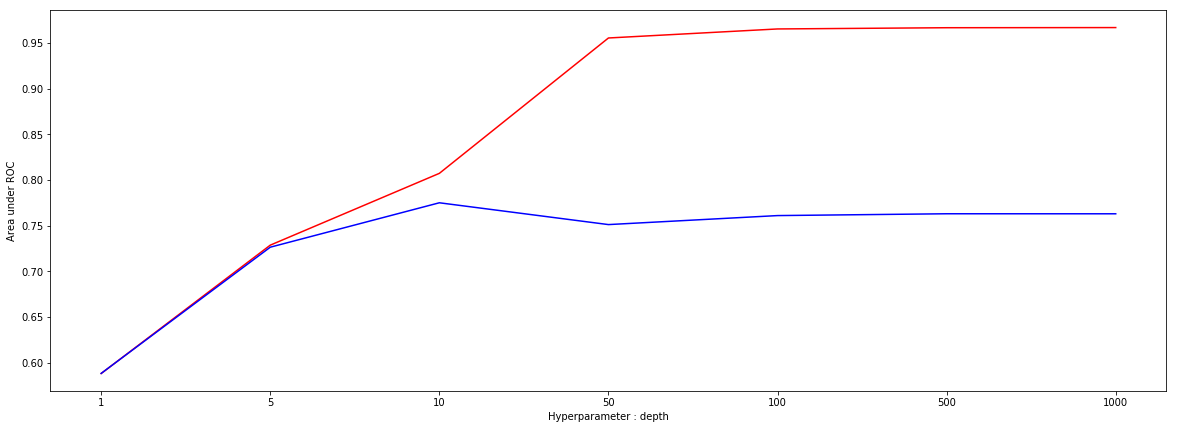

In [8]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [9]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 10
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 10, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [12]:
auc_score_val

[0.588077639201924,
 0.7264871427039905,
 0.7769227249107877,
 0.786321075877789,
 0.7929775496933706,
 0.7906379565862616,
 0.7908824951234512]

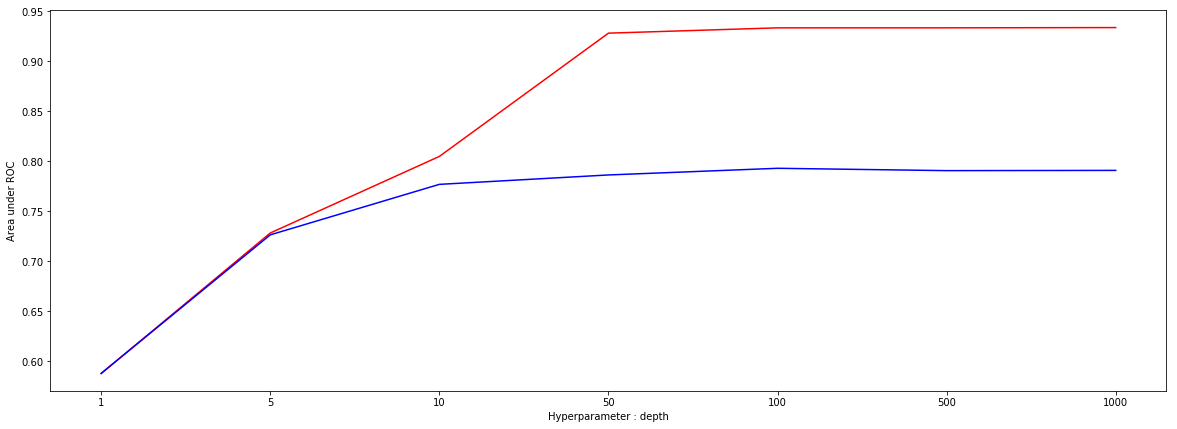

In [13]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [14]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 100
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 100, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [15]:
auc_score_val

[0.588077639201924,
 0.726043135774503,
 0.7843604774304963,
 0.8265153005441638,
 0.8265153005441638,
 0.8265153005441638,
 0.8265153005441638]

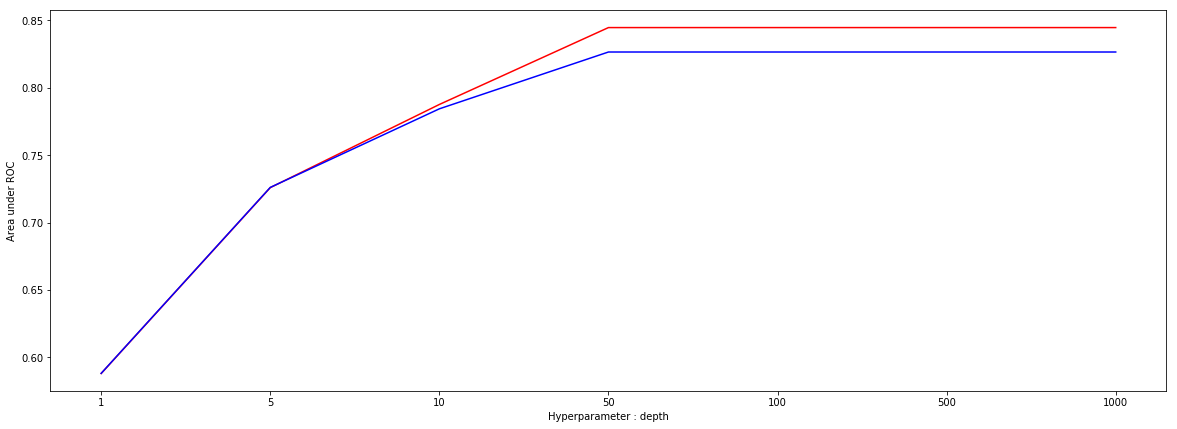

In [16]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [17]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 500
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 500, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [18]:
auc_score_val

[0.588077639201924,
 0.7166929979192616,
 0.7718793159810342,
 0.7925023016732118,
 0.7925023016732118,
 0.7925023016732118,
 0.7925023016732118]

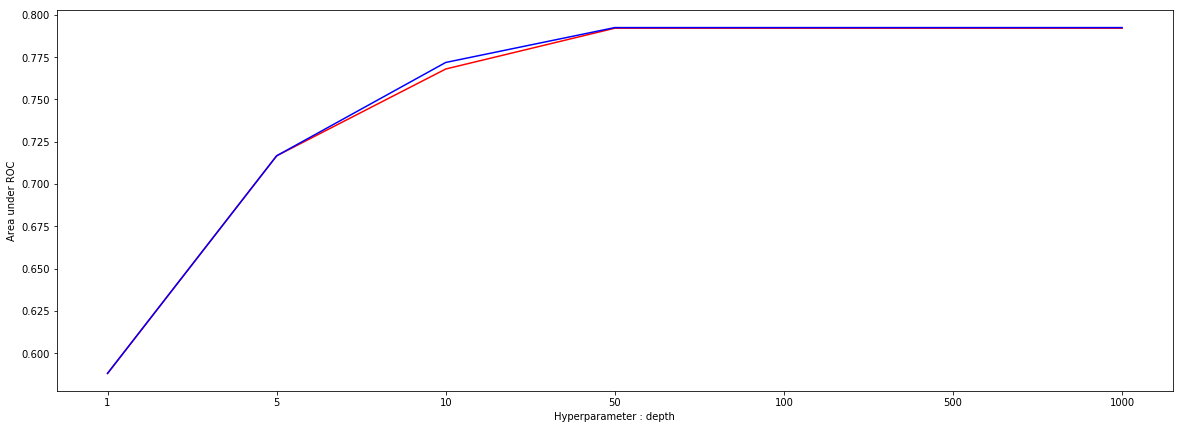

In [19]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [5]:
# Maximum AUC_ROC curve value is at max_depth = 50 & min_samples_leaf = 100
clf = DecisionTreeClassifier(max_depth = 50 , min_samples_leaf = 100 , class_weight= 'balanced')
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=50, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.8240542698560593


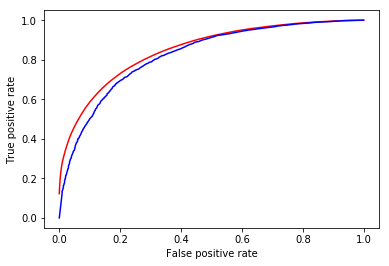

In [22]:
#plotting ROC curve for train and test data
false_positive_rate_train, true_positive_rate_train, thresholds_test = roc_curve(Y_train, clf.predict_proba(X_train)[:,1])
plt.plot(false_positive_rate_train,true_positive_rate_train,  color = 'r', label="Train ROC")

false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
print(auc(false_positive_rate_test, true_positive_rate_test))
plt.plot(false_positive_rate_test,true_positive_rate_test, color = 'b', label="Test ROC")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.rcParams["figure.figsize"] = [10,6]

plt.show()

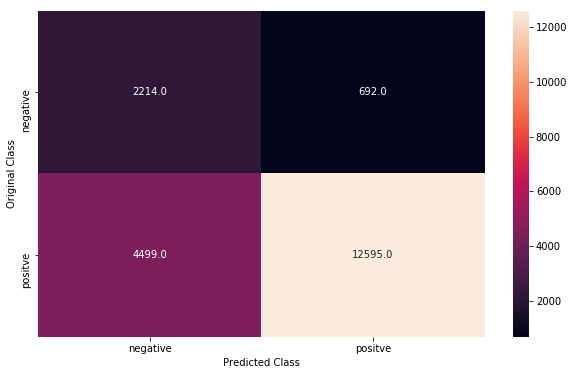

In [23]:
#plotting confusion matrix
import seaborn as sns
C = confusion_matrix(Y_test, clf.predict(X_test))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["negative","positve"], yticklabels=["negative","positve"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

### [5.1.1] Top 20 important features from<font color='red'> SET 1</font>

In [6]:
bow_feature_names = count_vect.get_feature_names()
w = clf.feature_importances_
#w_new = (w.T).reshape(w.shape[1],) 
ranking_index = np.argsort(w)
top_20 = ranking_index[-20:]
for index in top_20:
    print(bow_feature_names[index])

wonder
howev
review
nice
product
tast
high recommend
would
thought
money
favorit
excel
perfect
good
bad
delici
best
disappoint
love
great


### [5.1.2] Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [10]:
#https://pythonprogramminglanguage.com/decision-tree-visual-example/
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, max_depth =3,
                                feature_names=bow_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
import collections
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree_bow.png')

True

# TFIDF

In [11]:
#converting text to TFIDF
count_vect = TfidfVectorizer(ngram_range=(1,2), min_df = 0.01) # ignoring words that appears less than 1%
X_train_bow = count_vect.fit_transform(X_train_f.values)
X_test_bow = count_vect.transform(X_test_f)
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler(with_mean=False).fit_transform(X_train_bow)
X_test = StandardScaler(with_mean=False).fit_transform(X_test_bow)

## [5.2] Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [13]:
# splitting train data into training_new & validation data
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, train_size= 0.8)

In [14]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 5
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 5, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [15]:
auc_score_val

[0.5846793209888108,
 0.7160993680167921,
 0.763816083686036,
 0.7392501399502209,
 0.7407111437660766,
 0.7426419412037824,
 0.7384880278884085]

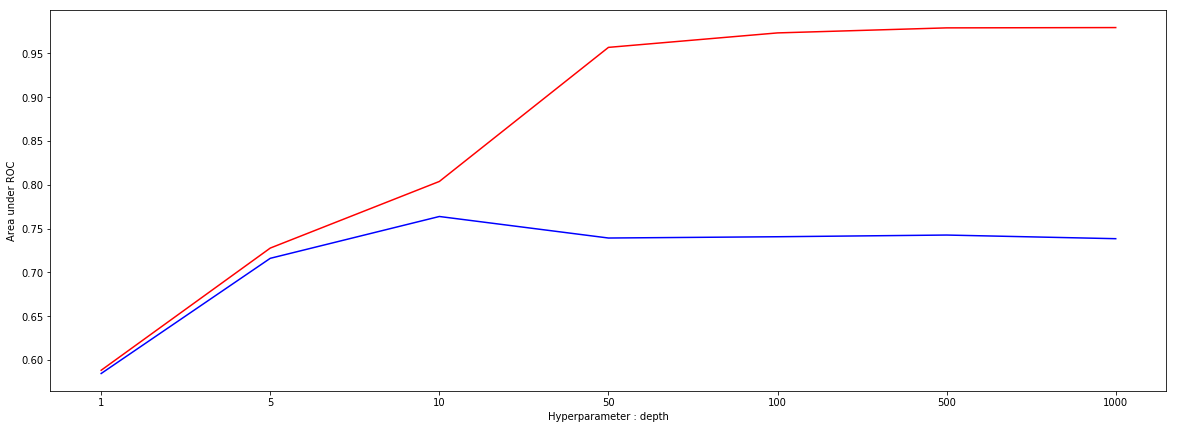

In [16]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [17]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 10
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 10, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [18]:
auc_score_val

[0.5846793209888108,
 0.7163758310575002,
 0.7651340792328364,
 0.7686625558860245,
 0.7736302661486699,
 0.771396079362343,
 0.7720188528129353]

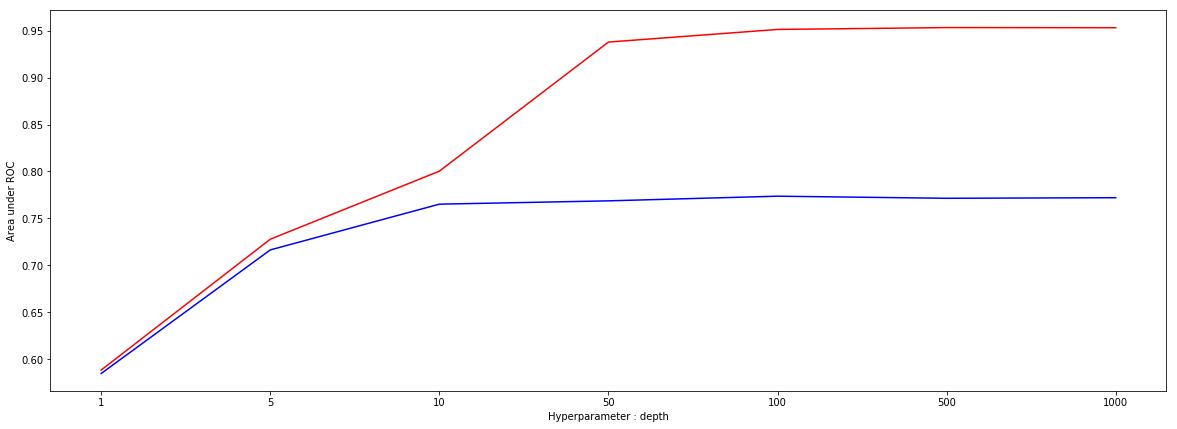

In [19]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [20]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 100
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 100, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [21]:
auc_score_val

[0.5846793209888108,
 0.7157206190703478,
 0.7658301529374033,
 0.8160955930691962,
 0.8166146870731024,
 0.8175250873757917,
 0.8164775316760374]

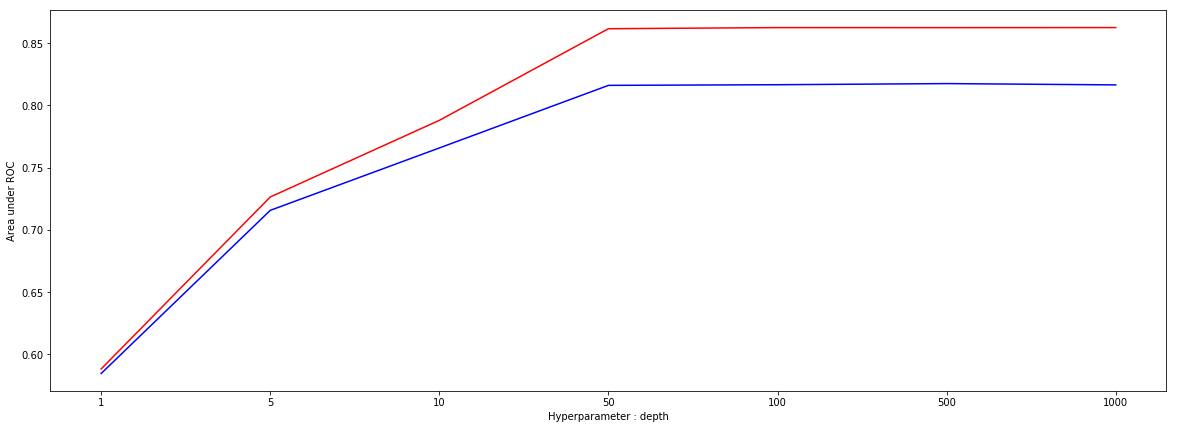

In [22]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [23]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 500
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 500, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [24]:
auc_score_val

[0.5846793209888108,
 0.7149680605059376,
 0.7608100919863994,
 0.7985019527689334,
 0.7985019527689334,
 0.7985019527689334,
 0.7985019527689334]

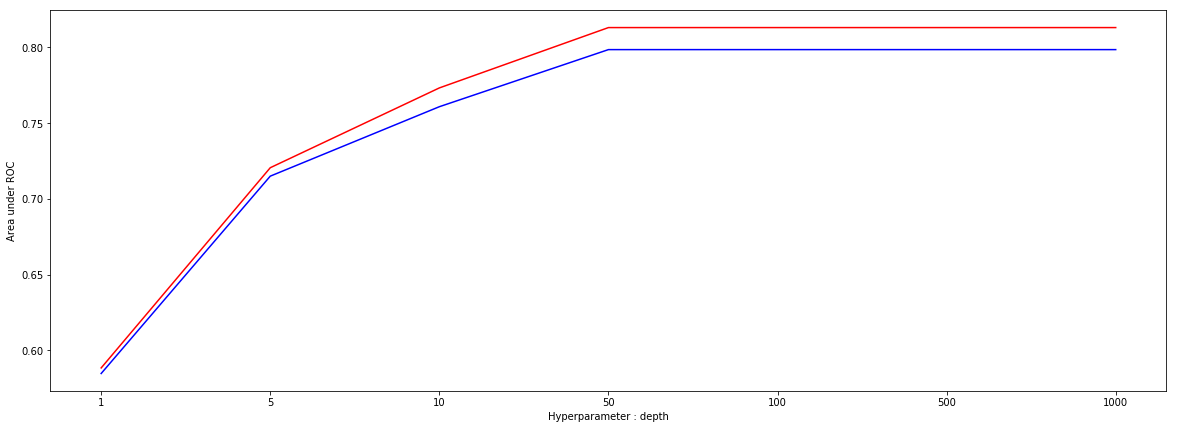

In [25]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [26]:
# Maximum AUC_ROC curve value is at max_depth = 50 & min_samples_leaf = 100
clf = DecisionTreeClassifier(max_depth = 500 , min_samples_leaf = 100 , class_weight= 'balanced')
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=500, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.8191882684440152


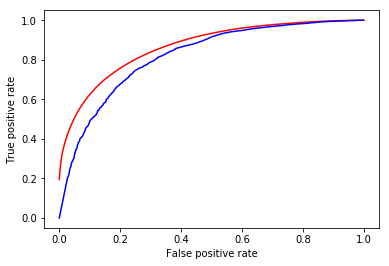

In [27]:
#plotting ROC curve for train and test data
false_positive_rate_train, true_positive_rate_train, thresholds_test = roc_curve(Y_train, clf.predict_proba(X_train)[:,1])
plt.plot(false_positive_rate_train,true_positive_rate_train,  color = 'r', label="Train ROC")

false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
print(auc(false_positive_rate_test, true_positive_rate_test))
plt.plot(false_positive_rate_test,true_positive_rate_test, color = 'b', label="Test ROC")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.rcParams["figure.figsize"] = [10,6]

plt.show()

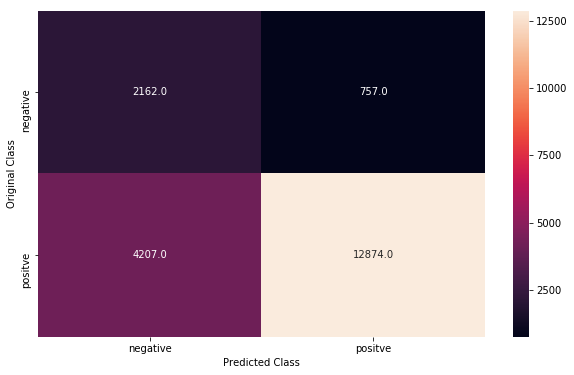

In [28]:
#plotting confusion matrix
import seaborn as sns
C = confusion_matrix(Y_test, clf.predict(X_test))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["negative","positve"], yticklabels=["negative","positve"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

### [5.2.1] Top 20 important features from<font color='red'> SET 2</font>

In [29]:
bow_feature_names = count_vect.get_feature_names()
w = clf.feature_importances_
#w_new = (w.T).reshape(w.shape[1],) 
ranking_index = np.argsort(w)
top_20 = ranking_index[-20:]
for index in top_20:
    print(bow_feature_names[index])

wonder
easi
product
would
money
find
nice
high recommend
thought
tast
bad
favorit
excel
perfect
good
delici
best
disappoint
love
great


### [5.2.2] Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [30]:
#https://pythonprogramminglanguage.com/decision-tree-visual-example/
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, max_depth =3,
                                feature_names=bow_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
import collections
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree_tfidf.png')

True

# Avg W2V

In [31]:
# taking only 1k data since large data is taking too long
con = sqlite3.connect('final.sqlite') 
final = pd.read_sql_query(""" SELECT * FROM Reviews limit 1000 """, con) 
final['label'] = np.where(final['Score']=='positive', 1, 0)

In [32]:
# splitting into train & test data
X_train_f, X_test_f, Y_train, Y_test = train_test_split(final['CleanedText'], final['label'], train_size= 0.8)

In [33]:
list_of_sent=[]
for sent in X_train_f.values:
    list_of_sent.append(sent.split())

In [34]:
w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [35]:
w2v_words = list(w2v_model.wv.vocab)

In [36]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [08:19<00:00,  2.15s/it]


In [37]:
X_train = pd.DataFrame(np.row_stack(sent_vectors))

In [38]:
list_of_sent=[]
for sent in X_test_f.values:
    list_of_sent.append(sent.split())

In [39]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [03:08<00:00,  2.28s/it]


In [40]:
X_test = pd.DataFrame(np.row_stack(sent_vectors))

## [5.3] Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [41]:
# splitting train data into training_new & validation data
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, train_size= 0.8)

In [42]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 5
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 5, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [43]:
auc_score_val

[0.5961538461538461,
 0.6079487179487179,
 0.5396153846153846,
 0.5534615384615386,
 0.5474358974358975,
 0.563076923076923,
 0.5434615384615386]

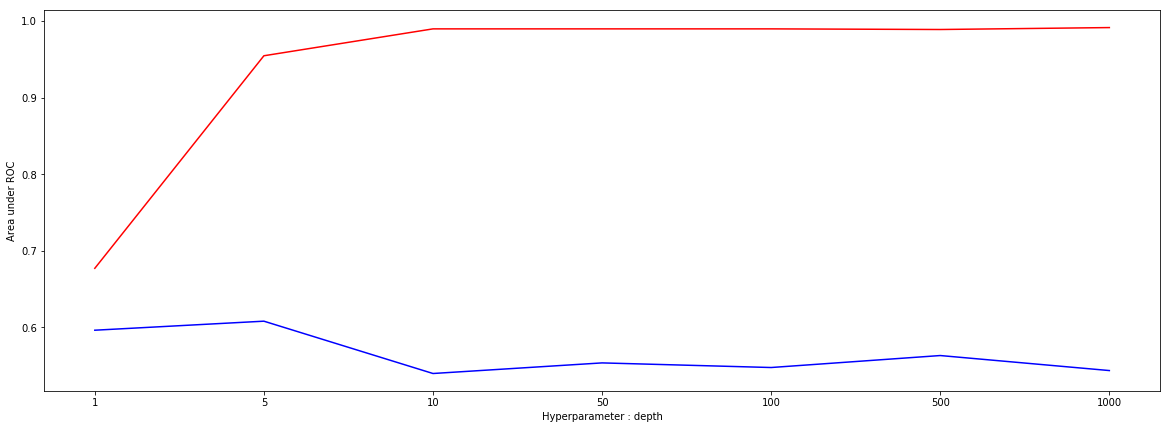

In [44]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [45]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 10
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 10, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [46]:
auc_score_val

[0.5961538461538461,
 0.5679487179487179,
 0.5734615384615384,
 0.5742307692307691,
 0.5908974358974358,
 0.57,
 0.5903846153846153]

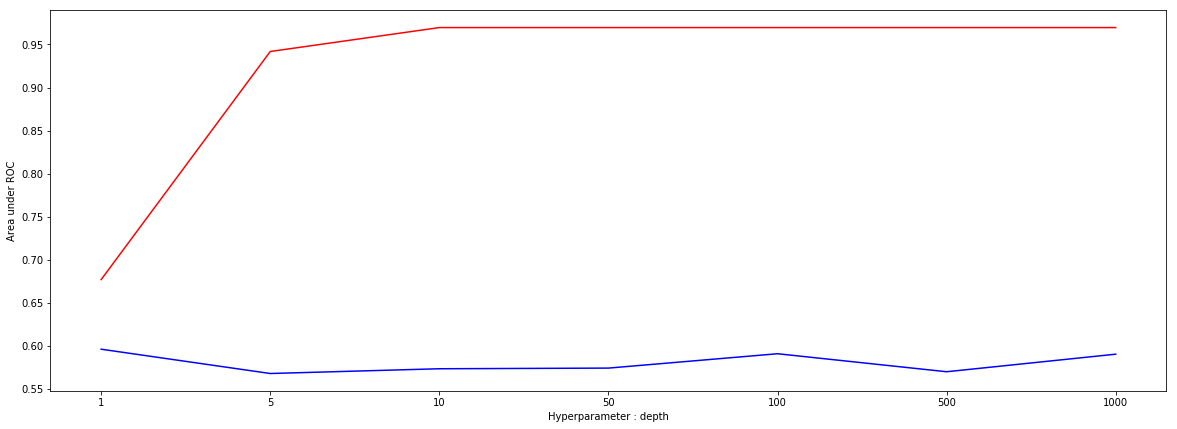

In [47]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [48]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 100
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 100, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [49]:
auc_score_val

[0.5961538461538461,
 0.5864102564102563,
 0.5864102564102563,
 0.5864102564102563,
 0.5864102564102563,
 0.5864102564102563,
 0.5864102564102563]

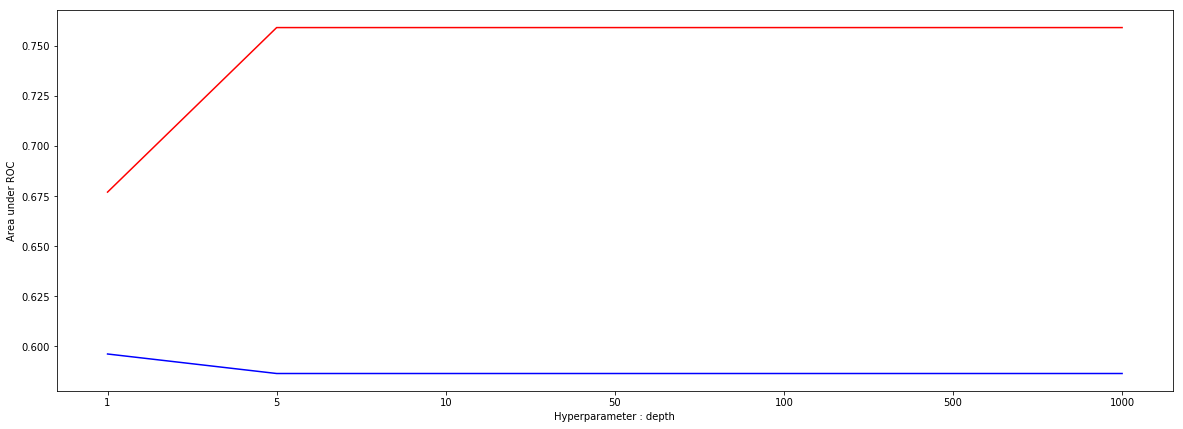

In [50]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [51]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 500
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 500, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [55]:
auc_score_val

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

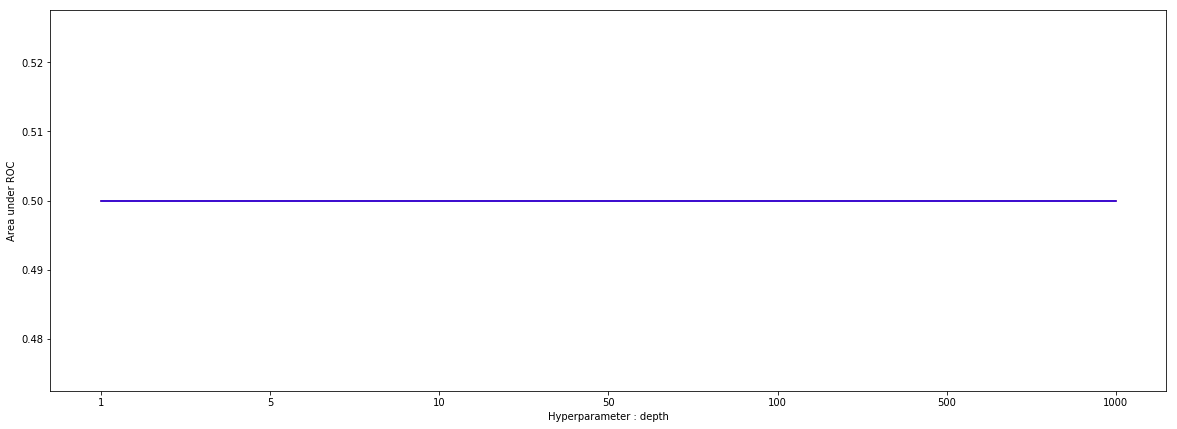

In [53]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [57]:
# Maximum AUC_ROC curve value is at max_depth = 5 & min_samples_leaf = 5
clf = DecisionTreeClassifier(max_depth =  5, min_samples_leaf = 5, class_weight= 'balanced')
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.5109851169383416


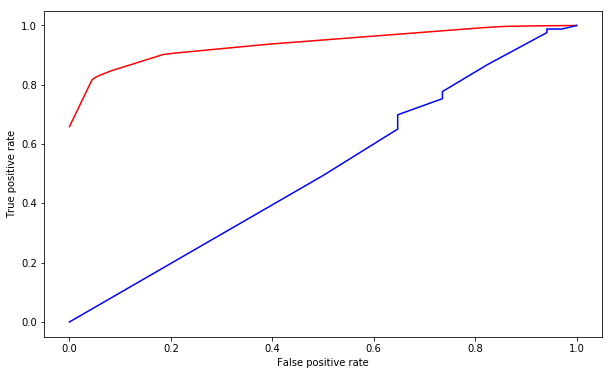

In [58]:
#plotting ROC curve for train and test data
false_positive_rate_train, true_positive_rate_train, thresholds_test = roc_curve(Y_train, clf.predict_proba(X_train)[:,1])
plt.plot(false_positive_rate_train,true_positive_rate_train,  color = 'r', label="Train ROC")

false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
print(auc(false_positive_rate_test, true_positive_rate_test))
plt.plot(false_positive_rate_test,true_positive_rate_test, color = 'b', label="Test ROC")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.rcParams["figure.figsize"] = [10,6]

plt.show()

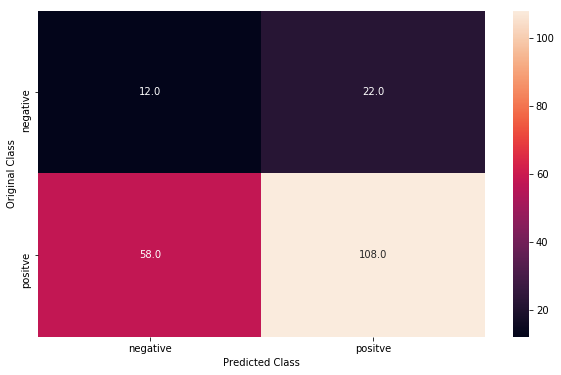

In [59]:
#plotting confusion matrix
import seaborn as sns
C = confusion_matrix(Y_test, clf.predict(X_test))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["negative","positve"], yticklabels=["negative","positve"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# TFIDF W2V

In [60]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(X_train_f.values)
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [61]:
list_of_sent=[]
for sent in X_train_f.values:
    list_of_sent.append(sent.split())

In [62]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [11:08<00:00,  2.12s/it]


In [63]:
X_train = pd.DataFrame(np.row_stack(tfidf_sent_vectors))

In [64]:
tf_idf_matrix = model.transform(X_test_f.values)

In [65]:
list_of_sent=[]
for sent in X_test_f.values:
    list_of_sent.append(sent.split())

In [66]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            dictionary_value = dictionary[word] if word in dictionary.keys() else 0 
            # if the word is not present in train data then idf value is zero
            tf_idf = dictionary_value*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [03:04<00:00,  2.32s/it]


In [67]:
X_test = pd.DataFrame(np.row_stack(tfidf_sent_vectors))

## [5.4] Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [68]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 5
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 5, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [69]:
auc_score_val

[0.5961538461538461,
 0.609102564102564,
 0.551923076923077,
 0.5485897435897437,
 0.5503846153846154,
 0.5756410256410256,
 0.5398717948717949]

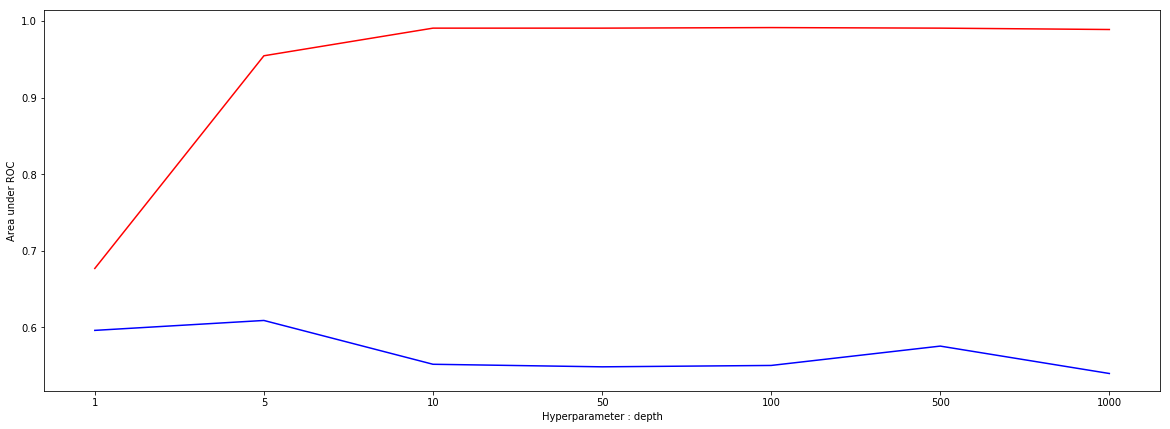

In [70]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [71]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 10
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 10, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [72]:
auc_score_val

[0.5961538461538461,
 0.5744871794871794,
 0.5858974358974359,
 0.597051282051282,
 0.5425641025641025,
 0.5758974358974359,
 0.579102564102564]

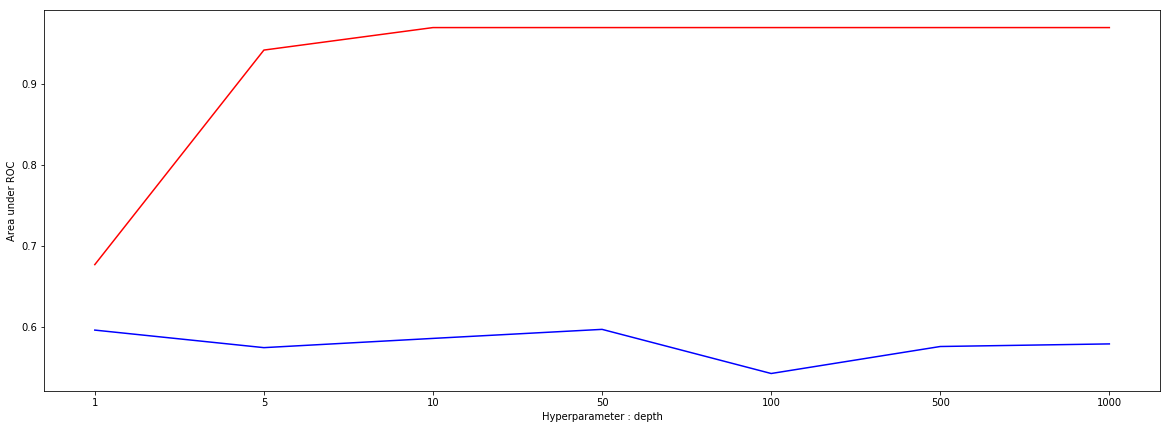

In [73]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [74]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 100
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 100, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [75]:
auc_score_val

[0.5961538461538461,
 0.5864102564102563,
 0.5864102564102563,
 0.5864102564102563,
 0.5864102564102563,
 0.5864102564102563,
 0.5864102564102563]

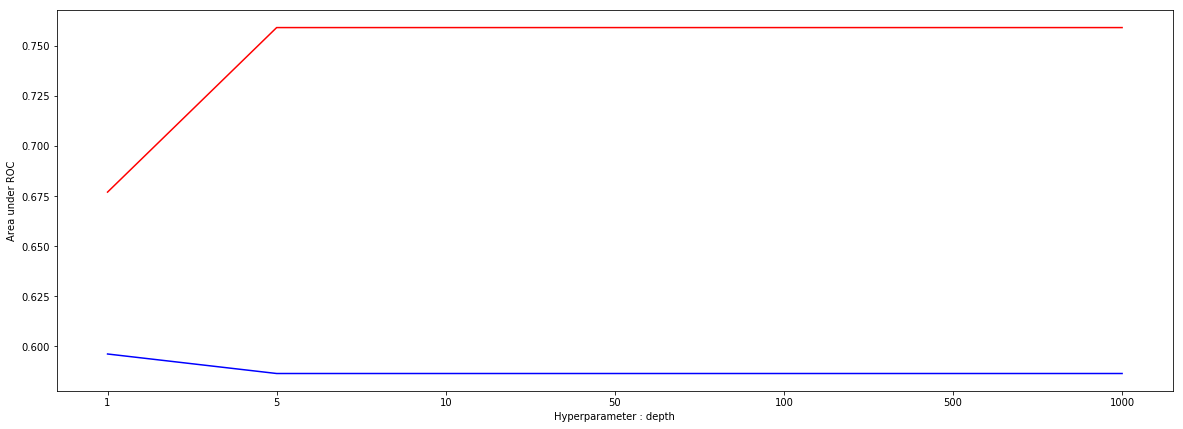

In [76]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [77]:
# calculating AUC for training_new and validation dataset under different values of max_depth (hyperparameter)
# minimum samples required to be at a leaf node taken is 500
param = [1, 5, 10, 50, 100, 500, 1000]
auc_score_train = []
auc_score_val = []
for value_p in param:
    clf = DecisionTreeClassifier(max_depth = value_p, min_samples_leaf = 500, class_weight= 'balanced')
    clf.fit(x_train, y_train)
    #https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
    false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    auc_score_train.append(auc(false_positive_rate_tr, true_positive_rate_tr))
    false_positive_rate_val, true_positive_rate_val, thresholds_val = roc_curve(y_val, clf.predict_proba(x_val)[:,1])
    auc_score_val.append(auc(false_positive_rate_val, true_positive_rate_val))

In [78]:
auc_score_val

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

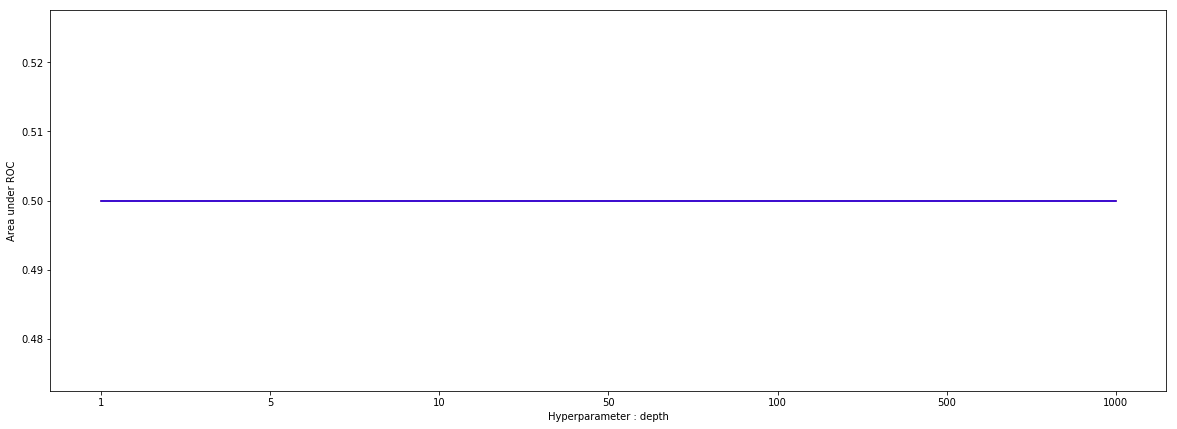

In [79]:
#plotting AUC values for different values of depth
param_x = ['1', '5', '10', '50', '100', '500', '1000']
plt.figure(figsize=(20,7))
plt.plot(param_x, auc_score_train, color = 'r', label="Train AUC")
plt.plot(param_x, auc_score_val, color = 'b', label="Validation AUC")
plt.xlabel('Hyperparameter : depth')
plt.ylabel('Area under ROC')
plt.show()

In [80]:
# Maximum AUC_ROC curve value is at max_depth = 5 & min_samples_leaf = 5
clf = DecisionTreeClassifier(max_depth = 5 , min_samples_leaf = 5, class_weight= 'balanced')
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.6094082211197732


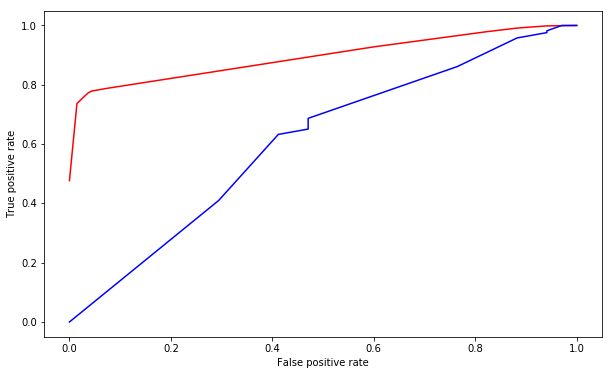

In [81]:
#plotting ROC curve for train and test data
false_positive_rate_train, true_positive_rate_train, thresholds_test = roc_curve(Y_train, clf.predict_proba(X_train)[:,1])
plt.plot(false_positive_rate_train,true_positive_rate_train,  color = 'r', label="Train ROC")

false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
print(auc(false_positive_rate_test, true_positive_rate_test))
plt.plot(false_positive_rate_test,true_positive_rate_test, color = 'b', label="Test ROC")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.rcParams["figure.figsize"] = [10,6]

plt.show()

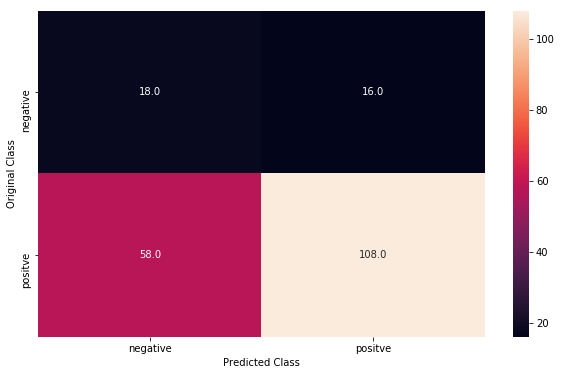

In [82]:
#plotting confusion matrix
import seaborn as sns
C = confusion_matrix(Y_test, clf.predict(X_test))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["negative","positve"], yticklabels=["negative","positve"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# [6] Conclusions

In [83]:
# Comparing best model of each vectorizer
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Max_depth", "Min_samples_leaf", "AUC"]

x.add_row(["BOW", "Decision Tree Classifier", 50, 100, 0.824])
x.add_row(["TFIDF", "Decision Tree Classifier", 500, 100, 0.819])
x.add_row(["Avg W2V", "Decision Tree Classifier", 5, 5, 0.510])
x.add_row(["TFIDF W2V", "Decision Tree Classifier", 5, 5, 0.609])

print(x)

+------------+--------------------------+-----------+------------------+-------+
| Vectorizer |          Model           | Max_depth | Min_samples_leaf |  AUC  |
+------------+--------------------------+-----------+------------------+-------+
|    BOW     | Decision Tree Classifier |     50    |       100        | 0.824 |
|   TFIDF    | Decision Tree Classifier |    500    |       100        | 0.819 |
|  Avg W2V   | Decision Tree Classifier |     5     |        5         |  0.51 |
| TFIDF W2V  | Decision Tree Classifier |     5     |        5         | 0.609 |
+------------+--------------------------+-----------+------------------+-------+
